In [1]:
%matplotlib inline

import os
import datacube
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.temporal import xr_phenology, temporal_statistics
from dea_tools.datahandling import load_ard
from dea_tools.bandindices import calculate_indices
from dea_tools.plotting import display_map, rgb
from dea_tools.dask import create_local_dask_cluster

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create local dask cluster to improve data load time
client = create_local_dask_cluster(return_client=True)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/8787/status,
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/8787/status,Workers: 1
Total threads: 2,Total memory: 12.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41215,Workers: 1
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/8787/status,Total threads: 2
Started: Just now,Total memory: 12.21 GiB
Comm: tcp://127.0.0.1:45675,Total threads: 2
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/41183/status,Memory: 12.21 GiB
Nanny: tcp://127.0.0.1:38193,


In [2]:
dc = datacube.Datacube(app='Vegetation_phenology')

In [3]:
# Define area of interest
lat_min, lat_max = -16.864381, -16.864535
lon_min, lon_max = 145.757198, 145.757532

# Set the range of dates for the analysis
time_range = ('2016-04-19', '2023-05-13')

# Set the vegetation proxy to use
veg_proxy = 'NDVI'


In [4]:
display_map(x=(lon_min, lon_max), y=(lat_min, lat_max))

In [5]:
# Create a reusable query
query = {
    'x': (lon_min, lon_max),
    'y': (lat_min, lat_max),
    'time': time_range,
    'measurements': ['nbart_red', 'nbart_green', 'nbart_blue', 'nbart_nir_1'],
    'resolution': (-20, 20),
    'output_crs': 'epsg:6933',
    'group_by':'solar_day'
}

# Load available data from Sentinel-2
ds = load_ard(
    dc=dc,
    products=['ga_s2am_ard_3', 'ga_s2bm_ard_3'],
    cloud_mask='s2cloudless',
    min_gooddata=0.9,
    **query,
)

# Shut down Dask client now that we have loaded the data we need
client.close()

# Preview data
ds

Finding datasets
    ga_s2am_ard_3
    ga_s2bm_ard_3
Counting good quality pixels for each time step using s2cloudless
Filtering to 396 out of 923 time steps with at least 90.0% good quality pixels
Applying s2cloudless pixel quality/cloud mask
Loading 396 time steps


/env/lib/python3.8/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


<xarray.Dataset>
Dimensions:      (time: 396, y: 2, x: 3)
Coordinates:
  * time         (time) datetime64[ns] 2016-04-19T00:30:34.457000 ... 2023-05...
  * y            (y) float64 -2.121e+06 -2.121e+06
  * x            (x) float64 1.406e+07 1.406e+07 1.406e+07
    spatial_ref  int32 6933
Data variables:
    nbart_red    (time, y, x) float32 195.0 191.0 195.0 ... 333.0 388.0 338.0
    nbart_green  (time, y, x) float32 532.0 515.0 487.0 ... 546.0 430.0 388.0
    nbart_blue   (time, y, x) float32 263.0 253.0 256.0 ... 360.0 358.0 349.0
    nbart_nir_1  (time, y, x) float32 3.192e+03 3.001e+03 ... 1.164e+03 1.02e+03
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

In [ ]:
# Calculate the chosen vegetation proxy index and add it to the loaded data set
ds = calculate_indices(ds, index=veg_proxy, collection='ga_s2_3')

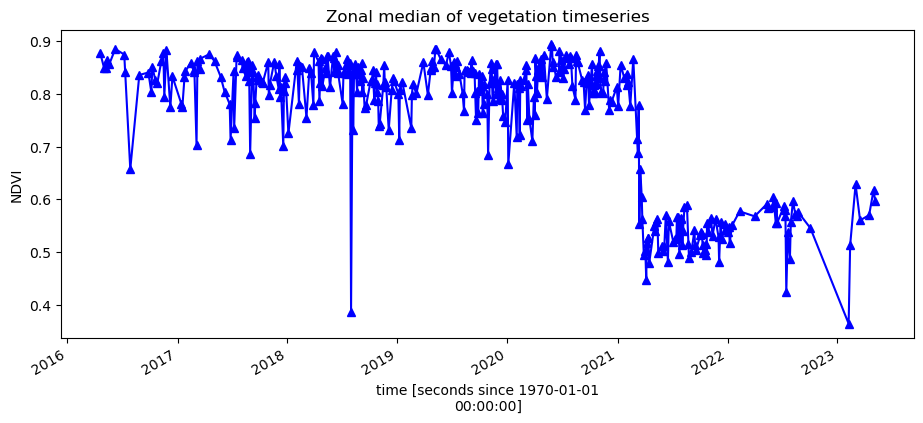

In [ ]:
ds.NDVI.median(['x', 'y']).plot.line('b-^', figsize=(11,4))
plt.title('Zonal median of vegetation timeseries');

In [ ]:
resample_period='1M'
window=4

veg_smooth=ds[veg_proxy].resample(time=resample_period).median().rolling(time=window, min_periods=1).mean()


Text(0, 0.5, 'NDVI')

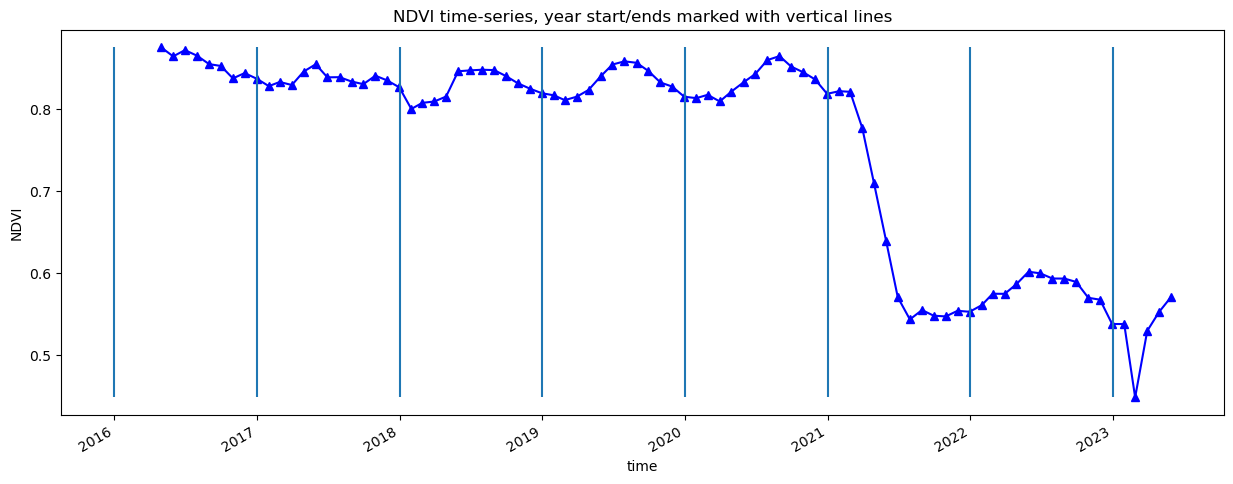

In [ ]:
veg_smooth_1D = veg_smooth.mean(['x', 'y'])
veg_smooth_1D.plot.line('b-^', figsize=(15,5))
_max=veg_smooth_1D.max()
_min=veg_smooth_1D.min()

for year in range(2016, 2024):
    plt.vlines(np.datetime64(str(year)+'-01-01'), ymin=_min, ymax=_max)

plt.title(veg_proxy+' time-series, year start/ends marked with vertical lines')
plt.ylabel(veg_proxy)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/8787/status,
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/8787/status,Workers: 1
Total threads: 2,Total memory: 12.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44097,Workers: 1
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/8787/status,Total threads: 2
Started: Just now,Total memory: 12.21 GiB
Comm: tcp://127.0.0.1:33299,Total threads: 2
Dashboard: /user/jmackenzie@earthwatch.org.au/proxy/40165/status,Memory: 12.21 GiB
Nanny: tcp://127.0.0.1:42161,


Finding datasets
    ga_s2am_ard_3
    ga_s2bm_ard_3
Counting good quality pixels for each time step using s2cloudless
Filtering to 401 out of 914 time steps with at least 90.0% good quality pixels
Applying s2cloudless pixel quality/cloud mask
Loading 401 time steps


/env/lib/python3.8/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


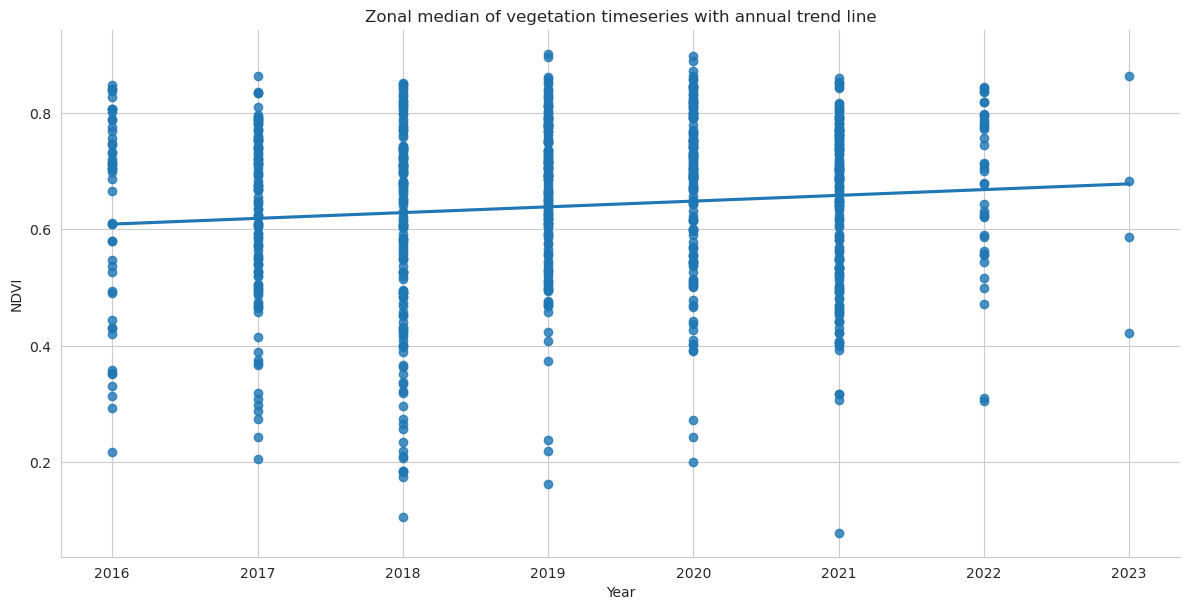

In [ ]:
%matplotlib inline

import os
import datacube
import numpy as np
import pandas as pd
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.temporal import xr_phenology, temporal_statistics
from dea_tools.datahandling import load_ard
from dea_tools.bandindices import calculate_indices
from dea_tools.plotting import display_map, rgb
from dea_tools.dask import create_local_dask_cluster

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create local dask cluster to improve data load time
client = create_local_dask_cluster(return_client=True)
dc = datacube.Datacube(app='Vegetation_phenology')
# Define area of interest
lat_min, lat_max = -16.830871, -16.830720
lon_min, lon_max = 145.732532, 145.732577

# Set the range of dates for the analysis
time_range = ('2016-04-19', '2023-04-19')

# Set the vegetation proxy to use
veg_proxy = 'NDVI'
display_map(x=(lon_min, lon_max), y=(lat_min, lat_max))
# Create a reusable query
query = {
    'x': (lon_min, lon_max),
    'y': (lat_min, lat_max),
    'time': time_range,
    'measurements': ['nbart_red', 'nbart_green', 'nbart_blue', 'nbart_nir_1'],
    'resolution': (-20, 20),
    'output_crs': 'epsg:6933',
    'group_by':'solar_day'
}

# Load available data from Sentinel-2
ds = load_ard(
    dc=dc,
    products=['ga_s2am_ard_3', 'ga_s2bm_ard_3'],
    cloud_mask='s2cloudless',
    min_gooddata=0.9,
    **query,
)

# Shut down Dask client now that we have loaded the data we need
client.close()

# Preview data
ds

# Calculate the chosen vegetation proxy index and add it to the loaded data set
ds = calculate_indices(ds, index=veg_proxy, collection='ga_s2_3')

# Convert the xarray dataset to a pandas dataframe
df = ds[veg_proxy].to_dataframe().reset_index()

# Add a year column to the dataframe
df['year'] = pd.DatetimeIndex(df['time']).year

# Plot the annual trend line with seaborn
sns.set_style('whitegrid')
sns.lmplot(x='year', y=veg_proxy, data=df, height=6, aspect=2, ci=None)

# Add a title and labels to the plot
plt.title('Zonal median of vegetation timeseries with annual trend line')
plt.xlabel('Year')
plt.ylabel('NDVI')

# Save the plot as a .jpg file
plt.savefig('veg_timeseries.jpg')

# Save zonal median vegetation timeseries data to a CSV file
df = ds.NDVI.median(['x', 'y']).to_dataframe(name='NDVI')
df.to_csv('zonal_median_vegetation_timeseries.csv')


In [ ]:
# Save zonal median vegetation timeseries data to a CSV file
df = ds.NDVI.median(['x', 'y']).to_dataframe(name='NDVI')
df.to_csv('zonal_median_vegetation_timeseries.csv')